In [68]:
import numpy as np
import pandas as pd

In [69]:
d = pd.read_csv("Total.csv")
d

C:\Users\nites\AppData\Local\Temp\ipykernel_9060\2329578366.py:1: DtypeWarning: Columns (2,3,4,5) have mixed types. Specify dtype option on import or set low_memory=False.
  d = pd.read_csv("Total.csv")


,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year
0,NATHANIEL FORD,GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY,167411.18,0.0,400184.25,Not Provided,567595.43,567595.43,2011
1,GARY JIMENEZ,CAPTAIN III (POLICE DEPARTMENT),155966.02,245131.88,137811.38,Not Provided,538909.28,538909.28,2011
2,ALBERT PARDINI,CAPTAIN III (POLICE DEPARTMENT),212739.13,106088.18,16452.6,Not Provided,335279.91,335279.91,2011
3,CHRISTOPHER CHONG,WIRE ROPE CABLE MAINTENANCE MECHANIC,77916.0,56120.71,198306.9,Not Provided,332343.61,332343.61,2011
4,PATRICK GARDNER,"DEPUTY CHIEF OF DEPARTMENT,(FIRE DEPARTMENT)",134401.6,9737.0,182234.59,Not Provided,326373.19,326373.19,2011
...,...,...,...,...,...,...,...,...,...
312877,Daniel W Plautz,Public Service Trainee,0.0,0.0,0.0,0.0,0.00,0.00,2018
312878,David J Thompson,Deputy Sheriff,0.0,0.0,0.0,0.0,0.00,0.00,2018
312879,Keiko Weng Yee Lau,Public Service Trainee,0.0,0.0,0.0,0.0,0.00,0.00,2018
312880,David Wong,Deputy Sheriff,0.0,0.0,0.0,0.0,0.00,0.00,2018


In [70]:
d.columns

Index(['EmployeeName', 'JobTitle', 'BasePay', 'OvertimePay', 'OtherPay',
       'Benefits', 'TotalPay', 'TotalPayBenefits', 'Year'],
      dtype='object')

In [71]:
d.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 312882 entries, 0 to 312881
Data columns (total 9 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   EmployeeName      312882 non-null  object 
 1   JobTitle          312882 non-null  object 
 2   BasePay           312882 non-null  object 
 3   OvertimePay       312882 non-null  object 
 4   OtherPay          312882 non-null  object 
 5   Benefits          312882 non-null  object 
 6   TotalPay          312882 non-null  float64
 7   TotalPayBenefits  312882 non-null  float64
 8   Year              312882 non-null  int64  
dtypes: float64(2), int64(1), object(6)
memory usage: 21.5+ MB


In [ ]:
'''Load the dataset to make analysis 

Firstly check the shape of dataset.
Next  find the column names
After this, I have check the all column datatype with the help of .info() function'''

## Data Cleaning & Preprocessing

In [72]:
#['BasePay', 'OvertimePay', 'OtherPay', 'Benefits']
#These four columns look numeric, but in the dataset they’re stored as object (string).
pay_col = ['BasePay', 'OvertimePay', 'OtherPay', 'Benefits']


In [73]:
#If the value is an actual missing value (NaN/None), keep it as NaN (the standard missing marker for numeric columns).

def to_number(s):
    if pd.isna(s): 
        return np.nan  #Keep missing values as NaN
    
    s = str(s).strip()  #convert to string, remove spaces
    
    # Handle common "missing" placeholders
    if s.lower() in {'not provided','n/a','na','-',''}:
        return np.nan
    
    #Remove formatting noice
    s = (s.replace('$','')
         .replace(',','')
         .replace(' ','')
         .replace('(','')
         .replace(')','')
         )
    
    #Final attempt to convert
    try:
        return float(s)
    except:
        return np.nan


In [74]:
'''Converts all entries to strings, trims spaces.

Maps "Not Provided", "N/A", "-", etc. → NaN.

Removes symbols ($, ,, spaces) and handles negatives like "(200)" → -200.

Converts to float safely, if fails → NaN.'''


'Converts all entries to strings, trims spaces.\n\nMaps "Not Provided", "N/A", "-", etc. → NaN.\n\nRemoves symbols ($, ,, spaces) and handles negatives like "(200)" → -200.\n\nConverts to float safely, if fails → NaN.'

In [75]:
#Apply cleaning to all pay columns
for c in pay_col:
    d[c] = d[c].apply(to_number)
    
#Each pay column is now numeric(float)

In [76]:
print(d[pay_col].dtypes)

BasePay        float64
OvertimePay    float64
OtherPay       float64
Benefits       float64
dtype: object


In [77]:
print(d[pay_col].isna().sum())

BasePay          606
OvertimePay        1
OtherPay           1
Benefits       36160
dtype: int64


## Handle Missing Values

In [78]:
# If missing benifits means "No Benifits", replace NaN with 0
d['BasePay'] = d['BasePay'].fillna(0.0)

d['Benefits'] = d['Benefits'].fillna(0.0)

d['OtherPay'] = d['OtherPay'].fillna(0.0)

d['OvertimePay'] = d['OvertimePay'].fillna(0.0)

In [79]:
print(d[pay_col].isna().sum())

BasePay        0
OvertimePay    0
OtherPay       0
Benefits       0
dtype: int64


### Clean Text column

In [80]:
# Remove text is clean
d['JobTitle'] = d['JobTitle'].astype(str).str.strip()
d['EmployeeName'] = d['EmployeeName'].astype(str).str.strip()


#Removes extra spaces in names and titles

# Exploratory Data Analysis on cleaned data

### Summary & Structure

In [81]:
d.head()

,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year
0,NATHANIEL FORD,GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY,167411.18,0.00,400184.25,0.0,567595.43,567595.43,2011
1,GARY JIMENEZ,CAPTAIN III (POLICE DEPARTMENT),155966.02,245131.88,137811.38,0.0,538909.28,538909.28,2011
2,ALBERT PARDINI,CAPTAIN III (POLICE DEPARTMENT),212739.13,106088.18,16452.60,0.0,335279.91,335279.91,2011
3,CHRISTOPHER CHONG,WIRE ROPE CABLE MAINTENANCE MECHANIC,77916.00,56120.71,198306.90,0.0,332343.61,332343.61,2011
4,PATRICK GARDNER,"DEPUTY CHIEF OF DEPARTMENT,(FIRE DEPARTMENT)",134401.60,9737.00,182234.59,0.0,326373.19,326373.19,2011


In [82]:
d.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 312882 entries, 0 to 312881
Data columns (total 9 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   EmployeeName      312882 non-null  object 
 1   JobTitle          312882 non-null  object 
 2   BasePay           312882 non-null  float64
 3   OvertimePay       312882 non-null  float64
 4   OtherPay          312882 non-null  float64
 5   Benefits          312882 non-null  float64
 6   TotalPay          312882 non-null  float64
 7   TotalPayBenefits  312882 non-null  float64
 8   Year              312882 non-null  int64  
dtypes: float64(6), int64(1), object(2)
memory usage: 21.5+ MB


In [83]:
d.describe()

,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year
count,312882.000000,312882.000000,312882.000000,312882.000000,312882.000000,312882.000000,312882.000000
mean,69673.050600,5668.911274,3460.683913,22125.693989,78802.645788,100928.339777,2014.625303
std,45436.746729,12745.638970,7387.253906,16289.184099,53230.758542,66485.186495,2.290899
min,-474.400000,-292.800000,-7058.590000,-13939.420000,-618.130000,-3628.780000,2011.000000
25%,35342.125000,0.000000,0.000000,2079.272500,38803.000000,48955.072500,2013.000000
50%,67645.970000,0.000000,728.000000,26771.565000,74908.790000,100011.290000,2015.000000
75%,99236.202500,5223.115000,3958.680000,34288.847500,111386.897500,142376.300000,2017.000000
max,592394.340000,309481.030000,400184.250000,125891.730000,592394.340000,712802.360000,2018.000000


### Distribution of Pay Columns

In [84]:
import matplotlib.pyplot as plt

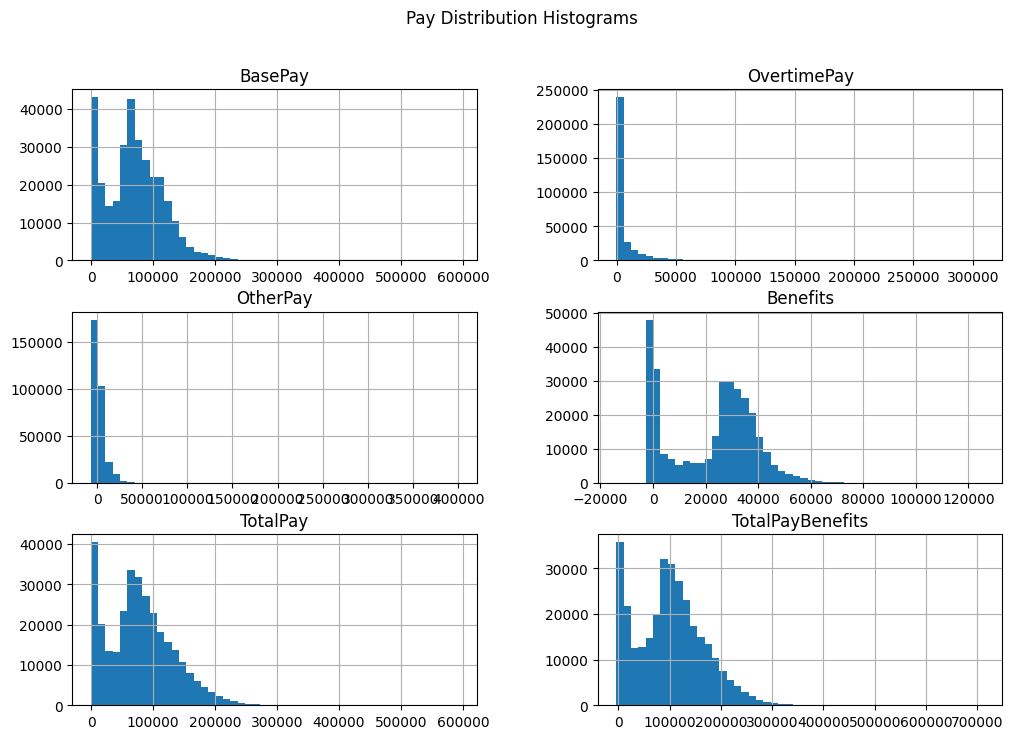

In [85]:
pay_cols = ['BasePay','OvertimePay','OtherPay','Benefits','TotalPay','TotalPayBenefits']

# Histogram for each pay column

d[pay_cols].hist(bins=50,figsize=(12,8))
plt.suptitle("Pay Distribution Histograms")
plt.show()

### Correlation Analysis

In [88]:
import seaborn as sns

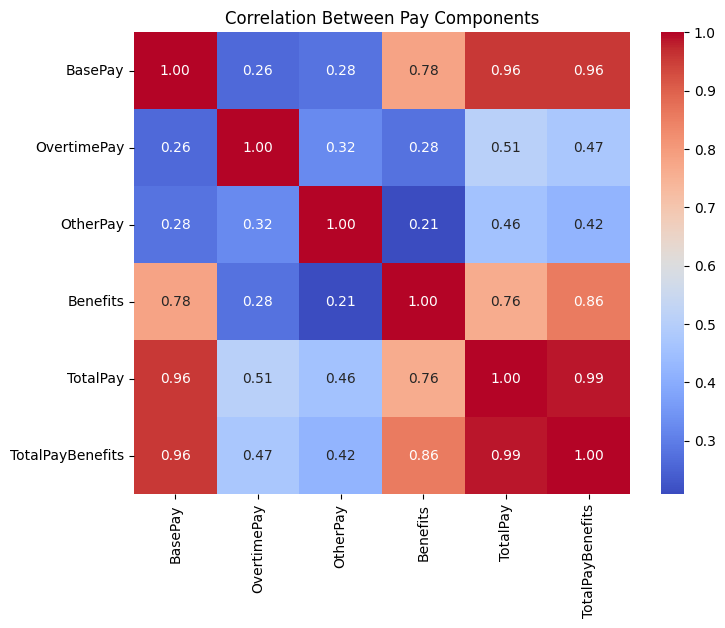

In [90]:
plt.figure(figsize=(8,6))
sns.heatmap(d[pay_cols].corr(), annot=True,cmap="coolwarm",fmt=".2f")
plt.title("Correlation Between Pay Components")
plt.show()

### Job Title Insights

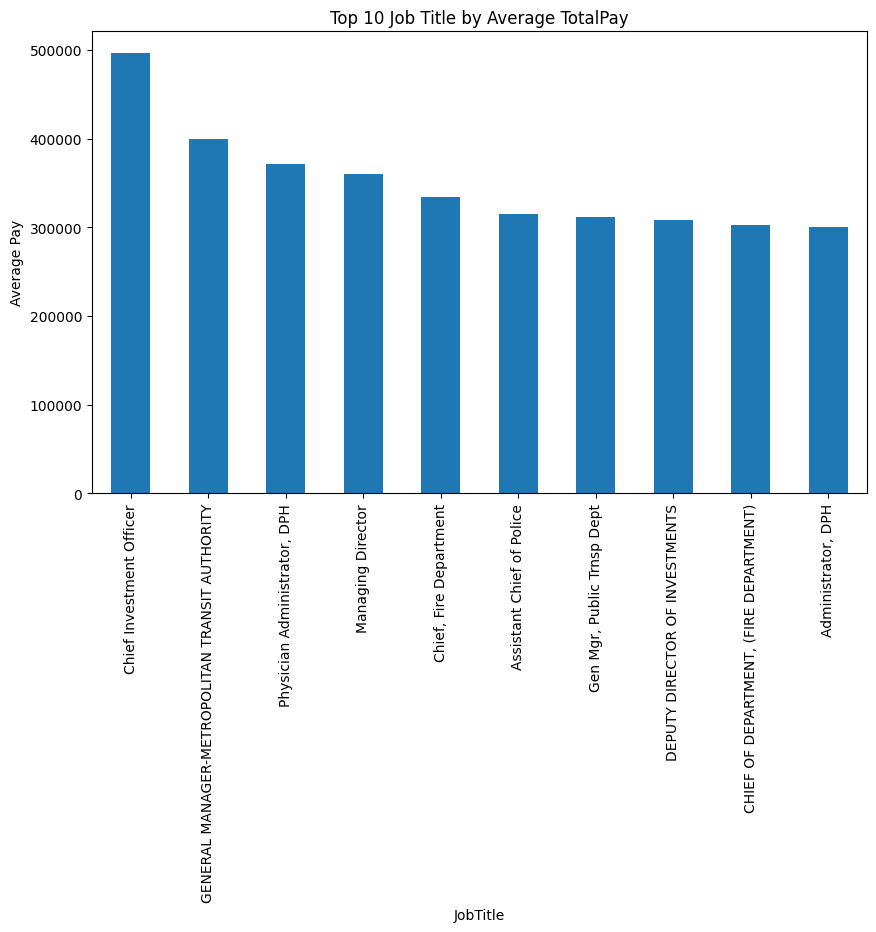

In [ ]:
# Top 10 hightest paid job titles(average TotalPay)
top_jobs = d.groupby("JobTitle")["TotalPay"].mean().sort_values(ascending=False).head(10)
top_jobs


#Plot
top_jobs.plot(kind="bar",figsize=(10,6))
plt.title("Top 10 Job Title by Average TotalPay")
plt.ylabel("Average Pay")
plt.show()

# This tells us which roles earn the most on average

### Trends Over Time

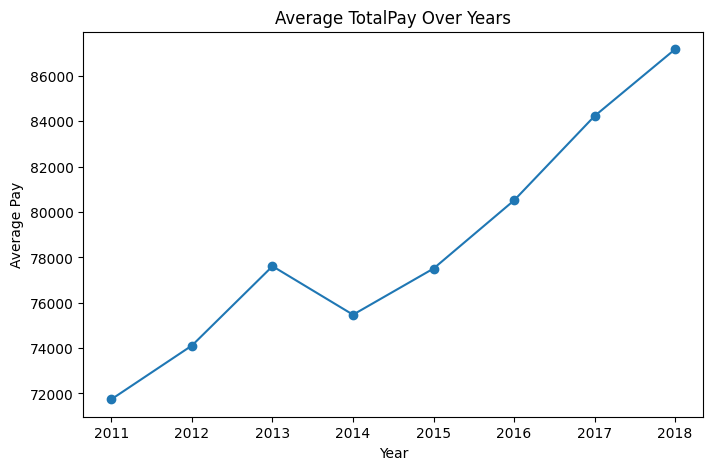

In [94]:
# Average pay by year
yearly_trend = d.groupby("Year")["TotalPay"].mean()

yearly_trend.plot(marker="o",figsize=(8,5))
plt.title("Average TotalPay Over Years")
plt.ylabel("Average Pay")
plt.xlabel("Year")
plt.show()